# Aula 5: Otimização e Combinação de Modelos
## 1.3 Limitações Lineares vs. Desdobramento Não Linear (UMAP)

Este notebook gera a Figura **[FIG_SWISS_ROLL_UMAP]**.

O objetivo didático desta visualização é demonstrar a capacidade extraordinária que os algoritmos de redução não lineares (como o UMAP) possuem de compreender a topologia local de dados complexos. 

Utilizaremos o clássico conjunto de dados sintético **Swiss Roll** (uma "fita" enrolada como um rocambole em 3 Dimensões). Em seguida, aplicaremos o UMAP para desenrolar essa estrutura em 2 Dimensões. Para garantir a reprodutibilidade e, simultaneamente, um resultado visualmente estético e didático do desdobramento, fixaremos a semente aleatória em **`2802`**. O gradiente de cores — que viaja de uma extremidade à outra da fita — deve ser integralmente preservado na projeção 2D, comprovando que a estrutura original não foi rasgada ou misturada.

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator # Necessário para otimizar os ticks 3D
from sklearn.datasets import make_swiss_roll
import os

# --- 1. IMPORTAÇÃO EXTERNA (COM TRATAMENTO RIGOROSO DE ERRO) ---
try:
    import umap
except ImportError:
    print("Atenção: A biblioteca 'umap-learn' não foi encontrada no seu ambiente.")
    print("Para gerar a projeção não linear deste notebook, execute o comando abaixo no terminal ou célula:")
    print("!pip install umap-learn ipywidgets")
    raise SystemExit


# --- 2. CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_MAGENTA = "#F255CE"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Criando um gradiente de cor vibrante com a paleta institucional para colorir o Swiss Roll
cmap_gran = LinearSegmentedColormap.from_list("gran_gradient", [COR_AZUL_PRINCIPAL, COR_MAGENTA, COR_VERMELHO])

# --- 3. CONFIGURAÇÕES DE TIPOGRAFIA (OTIMIZADO PARA PDF) ---
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Aplicação do tema base do Seaborn e Fundo dos Eixos institucionais
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Forçando o uso de fontes compatíveis com glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

## Geração Dramática do Swiss Roll e Desdobramento
Geraremos o Swiss Roll com alta densidade (`n_samples=3000`) e baixo ruído para enfatizar o aspecto de "fita contínua". O UMAP será configurado com `n_jobs=1` para garantir que o resultado seja deterministicamente idêntico ao *seed* escolhido, evitando alertas de paralelismo.

In [9]:
# --- 4. GERAÇÃO DE DADOS SINTÉTICOS ---
# Fixando a semente (Boas práticas para efeitos teóricos visuais extremos e reprodutíveis)
SEED_ESTETICO = 2802
np.random.seed(SEED_ESTETICO)

# Gerando o Swiss Roll em 3D
N_PONTOS = 3000
X_3d, posicoes_cores = make_swiss_roll(n_samples=N_PONTOS, noise=0.05, random_state=SEED_ESTETICO)

# Instanciando e treinando o UMAP (Transformação não linear de 3D para 2D)
# random_state fixo + n_jobs=1 garante reprodutibilidade total sem warnings
modelo_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=SEED_ESTETICO, n_jobs=1)
X_2d_umap = modelo_umap.fit_transform(X_3d)

## Geração do Gráfico: O Rocambole vs. A Fita Esticada
Posicionaremos as duas representações lado a lado simetricamente. No gráfico (a), aplicaremos otimizações nos eixos 3D para garantir que os números (*ticks*) fiquem legíveis e bem espaçados em leituras de PDF.

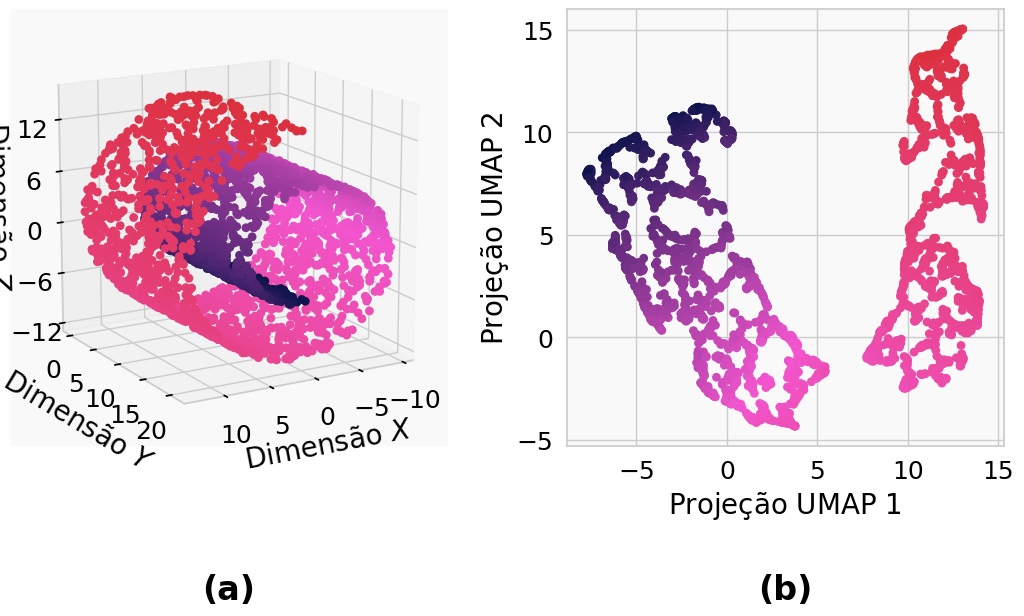

In [20]:
# --- 5. CONFIGURAÇÃO DA FIGURA LADO A LADO ---
fig = plt.figure(figsize=(12, 7))

# ==========================================
# EIXO (a): Espaço 3D Original (Otimizado para Legibilidade)
# ==========================================
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_facecolor(FUNDO_EIXOS) 

# Scatter plot 3D vibrante
ax1.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
            c=posicoes_cores, cmap=cmap_gran, s=40, depthshade=False, edgecolors='none')

# --- AJUSTE DE CÂMERA ---
ax1.view_init(elev=15, azim=60)

# --- OTIMIZAÇÃO CRÍTICA DE TICKS 3D E LABELS ---
ax1.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax1.zaxis.set_major_locator(MaxNLocator(nbins=5))

# pad=5 mantém os números fora da caixa do gráfico
ax1.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO, pad=5)

# Como movemos o plot para a direita, agora podemos padronizar todos os labelpads em 10!
ax1.set_xlabel(r'Dimensão $X$', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=10)
ax1.set_ylabel(r'Dimensão $Y$', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=10)
ax1.set_zlabel(r'Dimensão $Z$', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=10)

# Ancoragem da letra e força de proporção
ax1.text2D(0.5, -0.35, '(a)', transform=ax1.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE, color=COR_PRETO)
ax1.set_box_aspect([1, 1, 1])


# ==========================================
# EIXO (b): Espaço 2D Desdobrado pelo UMAP
# ==========================================
ax2 = fig.add_subplot(1, 2, 2)

# Scatter plot 2D
ax2.scatter(X_2d_umap[:, 0], X_2d_umap[:, 1], 
            c=posicoes_cores, cmap=cmap_gran, s=40, edgecolors='none')

# Formatação 2D
ax2.set_xlabel(r'Projeção UMAP $1$', fontsize=FONT_LABEL, color=COR_PRETO)
ax2.set_ylabel(r'Projeção UMAP $2$', fontsize=FONT_LABEL, color=COR_PRETO)
ax2.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)

# Ancoragem da letra e força de proporção
ax2.text(0.5, -0.35, '(b)', transform=ax2.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE, color=COR_PRETO)
ax2.set_box_aspect(1)


# --- 6. AJUSTES DE DIAGRAMAÇÃO E EXPORTAÇÃO ---
plt.tight_layout(w_pad=1.0)

# SOLUÇÃO APLICADA: left=0.08 empurra todo o bloco (a) para a direita, salvando definitivamente o Z
fig.subplots_adjust(left=0.10, right=0.95, bottom=0.35)

caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_05')
os.makedirs(caminho_save, exist_ok=True)

plt.savefig(
    os.path.join(caminho_save, '06_figura_swiss_roll_umap.png'), 
    dpi=300, 
    bbox_inches='tight', 
    pad_inches=0.4
)

plt.show()